In [1]:
import numpy as np

def perturb(df, col_list, mean, std_fix = 0, std_spec = 0, seed=None):
    df = df.copy()
    if seed is not None:
        np.random.seed(seed)
    for col in col_list:
        if std_spec:
            df[col] = df[col] + np.random.normal(mean, np.std(df[col])*std_spec, len(df))
        else:
            df[col] = df[col] + np.random.normal(mean, std_fix, len(df))
    return df

In [2]:
# testing pertubation function
import pandas as pd
from model_function import Load_Model
X_train = pd.DataFrame(Load_Model("X_train"), columns = Load_Model("features"))
X_test = pd.DataFrame(Load_Model("X_test"), columns = Load_Model("features"))


X_train_perturb = perturb(X_train, ['wind_speed', 'track_distance', 'percent_houses_damaged_5years'], 0, std_spec=0.1)
X_train_perturb


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A valu

,wind_speed,track_distance,total_houses,rainfall_max_6h,rainfall_max_24h,rwi,mean_slope,std_slope,mean_tri,std_tri,mean_elev,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged_5years
0,-0.749749,1.088299,1.135117,-0.622338,-0.614954,1.812785,-1.253141,-1.761114,-1.230703,-1.630404,-0.736261,1.419780,0.935205,2.616238,-0.995806,-0.532048,0.976106,-0.181914
1,-0.775800,1.583975,-0.266746,-0.775814,-0.955256,0.092268,-0.511528,-0.355795,-0.415348,-0.231075,-0.667434,1.360675,0.935205,-0.731012,-1.348081,1.783850,-0.273998,-0.233971
2,-0.801372,1.307624,-0.251563,-1.082427,-1.104843,0.184509,-0.841787,-1.132003,-0.812952,-1.061138,-0.695688,0.269003,0.935205,-0.731012,-1.429376,1.865587,-0.262936,-0.216285
3,2.244543,-1.649047,2.719272,0.107935,0.628674,3.700699,-0.886581,0.055877,-0.924670,0.161881,-0.583968,0.649223,0.935205,1.872405,-1.293885,0.203590,2.745908,-0.255679
4,-0.527027,-0.499749,0.013277,-0.354515,-0.217106,0.445665,-0.101521,0.727710,-0.090182,0.772969,-0.011754,-0.657215,-1.069284,-0.266117,0.928162,-0.777261,-0.147534,-0.312733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,2.614573,-1.553779,-0.209554,0.479312,0.817730,-1.200221,0.179528,0.368906,0.206790,0.261839,-0.186781,-0.657215,-1.069284,-0.591544,1.117849,-0.777261,-0.220732,-0.172198
39799,1.491182,-0.730822,-0.168857,-0.244553,0.146413,0.211687,-1.088423,-1.271972,-1.126675,-1.271957,-0.704177,0.546400,0.935205,-0.033669,-1.348081,1.375162,-0.146397,-0.031823
39800,-0.265749,0.865318,-0.270483,-0.972802,-0.959236,-0.642774,0.462960,1.558501,0.522721,1.727882,-0.338993,-0.046705,0.935205,-0.731012,-1.050002,1.484145,-0.279054,0.171874
39801,-0.441021,1.330661,-0.175807,-0.580512,-0.327223,-1.067426,-1.031316,-1.171678,-1.053768,-1.151963,-0.650142,-0.389708,0.935205,-0.731012,1.199144,-0.777261,-0.183397,-0.127661


In [3]:
def PGI(data, model, collist, mean, std_fix = 0, std_spec = 0, seed=None):
    data_perturb = perturb(data, collist, mean, std_fix, std_spec, seed)
    try:
        y_pred = model.predict(data)
    except:
        y_pred = model.predict(data.values) 
    y_pred_perturb = model.predict(data_perturb)
    return np.mean(np.abs(y_pred_perturb - y_pred))

In [4]:
df_perturb_top3 = perturb(X_train, ['wind_speed', 'track_distance', 'rainfall_max_6h'], 0, std_spec=0.1, seed = 0)

In [5]:
model = Load_Model('xgb_model')
y_pert = model.predict(df_perturb_top3)
y_train = model.predict(X_train)

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [6]:
diff = y_pert - y_train
np.mean(diff)
np.mean(np.abs(y_pert - y_train))

0.16788296

In [7]:
X_train.shape ==X_train_perturb.shape


True

In [8]:
print("Important Features:", PGI(X_test, model, ['wind_speed', 'track_distance', 'rainfall_max_6h'], 0, std_spec=0.1, seed = 0))
print("Unimportant Features:", PGI(X_test, model, ['std_slope', 'mean_elev', 'with_coast'], 0, std_spec=0.1, seed = 0))

Important Features: 0.16438144
Unimportant Features: 0.020326328


In [9]:
print("PGU Lime:", PGI(X_test, model, ['std_slope', 'mean_elev', 'with_coast'], 0, std_spec=0.1, seed = 0))
print("PGU SHAP:", PGI(X_test, model, ['rural', 'std_tri', 'with_coast'], 0, std_spec=0.1, seed = 0))

PGU Lime: 0.020326328
PGU SHAP: 0.006247346


In [10]:
# normalize X_train
# X_train is already normalized!
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

print("PGU Lime:", PGI(X_test_scaled, model, ['std_slope', 'mean_elev', 'with_coast'], 0, std_fix=0.1, seed = 0))
print("PGU SHAP:", PGI(X_test_scaled, model, ['rural', 'std_tri', 'with_coast'], 0, std_fix=0.1, seed = 0))

print("PGI Lime:", PGI(X_test_scaled, model, ['wind_speed', 'track_distance', 'rainfall_max_6h'], 0, std_fix=0.1, seed = 0))
print("PGU Lime:", PGI(X_test_scaled, model, ['std_slope', 'mean_elev', 'with_coast'], 0, std_fix=0.1, seed = 0))

PGU Lime: 7.8981575e-05
PGU SHAP: 0.00015858255
PGI Lime: 0.004137013
PGU Lime: 7.8981575e-05


## AUCs

In [26]:
shap_list = ['wind_speed', 'track_distance', 'rainfall_max_6h',
       'percent_houses_damaged_5years', 'rainfall_max_24h', 'urban',
       'mean_elev', 'coast_length', 'total_houses', 'rwi', 'std_slope',
       'mean_slope', 'total_pop', 'mean_tri', 'water', 'rural', 'std_tri',
       'with_coast']

PGI_shap = []
for k in range(len(shap_list)+1):
    p = PGI(X_test, model, shap_list[:k], 0, std_spec=0.1, seed = 0)
    PGI_shap.append(p)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Text(0.5, 1.0, 'PGI Shap')

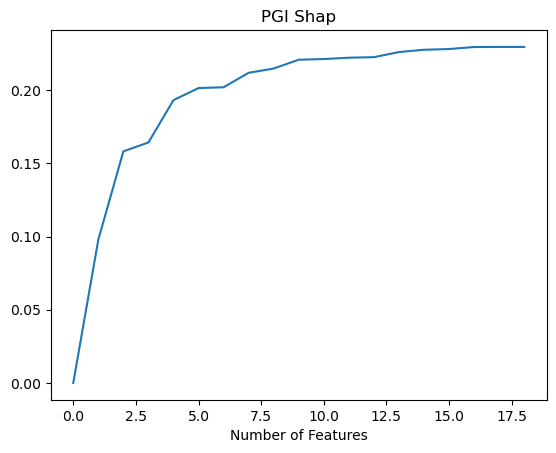

In [12]:
# calculate AUC for PGI
from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.plot(PGI_shap)
plt.xlabel('Number of Features')
plt.title("PGI Shap")

In [13]:
auc(np.arange(len(shap_list)), PGI_shap[:18])	

3.3584948517382145

In [25]:
lime_list = ['wind_speed',
 'track_distance',
 'rwi',
 'rainfall_max_6h',
 'percent_houses_damaged_5years',
 'rainfall_max_24h',
 'urban',
 'mean_elev',
 'coast_length',
 'rural',
 'std_slope',
 'total_pop',
 'water',
 'mean_tri',
 'total_houses',
 'std_tri',
 'with_coast',
 'mean_slope']

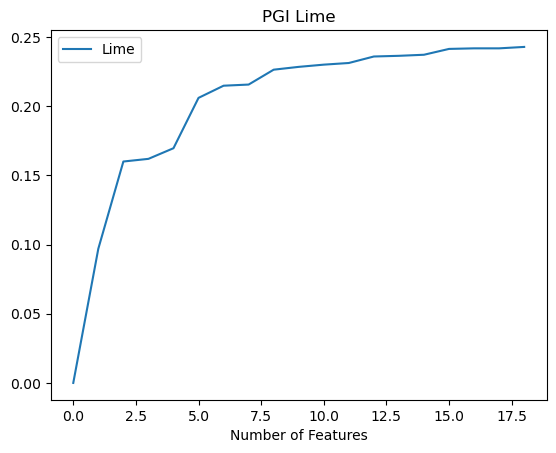

In [15]:
PGI_list = []
for k in range(len(lime_list)+1):
    p = PGI(X_train, model, lime_list[:k], 0, std_spec=0.1, seed = 0)
    PGI_list.append(p)

from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.plot(PGI_list, label = 'Lime')
plt.xlabel('Number of Features')
plt.title("PGI Lime")
plt.legend()

In [16]:
# calculate AUC for PGI
auc(np.arange(len(lime_list)), PGI_list[:18])	

3.4564498998224735

In [17]:
#list of 1-18
list(range(1,19))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [13]:
def auc_PGI(feature_list, data, model, mean = 0, std_fix = 0, std_spec = 0, seed=None, label = None, color = None):
    PGI_list = []
    for k in range(len(feature_list)):
        p = PGI(data, model, feature_list[:k], mean, std_fix = std_fix, std_spec = std_spec, seed=None)
        PGI_list.append(p)
    a = (auc(range(len(PGI_list)), PGI_list))
    if color:
        plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a), color = color)
    else:
        plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a))
    plt.xlabel('Number of Features')
    plt.xticks(range(len(PGI_list)), list(range(1,19)))
    if label:
        plt.legend()

    

In [21]:
from model_function import Load_Model
X_test_n = Load_Model("X_test_n")
print(X_test_n)
print(X_test)

      wind_speed  track_distance  total_houses  rainfall_max_6h  \
0       0.193660        0.713175      0.007956         0.068980   
1       0.611094        0.150058      0.002040         0.055798   
2       0.204476        0.529079      0.009271         0.185778   
3       0.264037        0.407865      0.000098         0.083648   
4       0.347062        0.219680      0.010905         0.032051   
...          ...             ...           ...              ...   
9946    0.110492        0.796723      0.004682         0.201577   
9947    0.059214        0.882087      0.015446         0.036735   
9948    0.449784        0.097960      0.010557         0.170075   
9949    0.642709        0.253910      0.015534         0.093244   
9950    0.266532        0.867401      0.000021         0.034571   

      rainfall_max_24h       rwi  mean_slope  std_slope  mean_tri   std_tri  \
0             0.115146  0.349886    0.344296   0.712472  0.342552  0.583462   
1             0.055271  0.195539    0

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




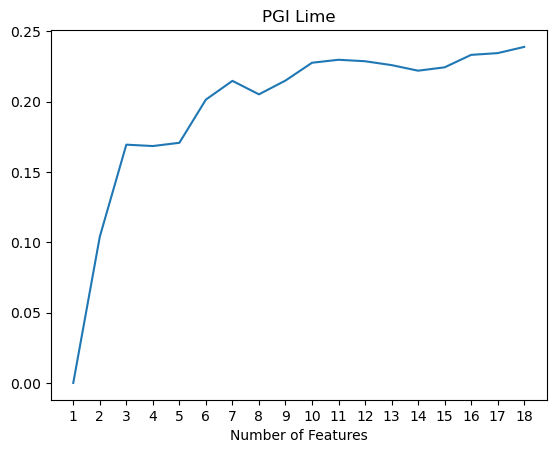

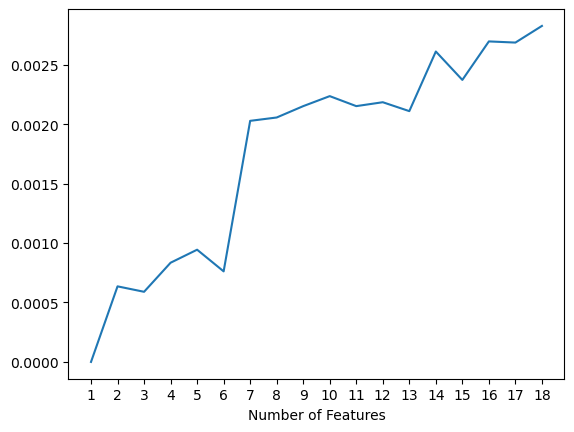

In [22]:
auc_PGI(lime_list, X_test, model, 0, std_spec=0.1, seed = 0)
plt.title("PGI Lime")

plt.figure()

auc_PGI(lime_list, pd.DataFrame(Load_Model("X_test_n"), columns = Load_Model("features")), model, 0, std_spec=0.1, seed = 0)


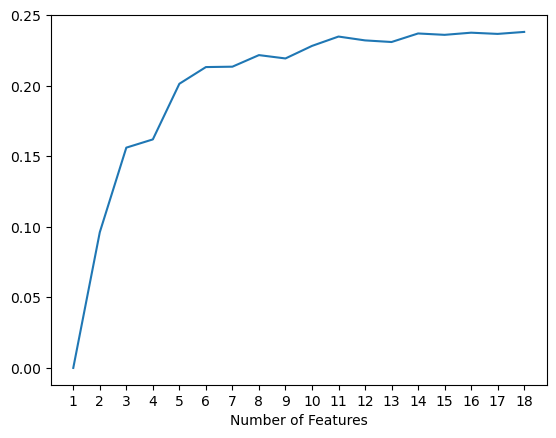

In [23]:
auc_PGI(shap_list, X_train, model, 0, std_spec=0.1, seed = 0)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

NameError: name 'lime_list' is not defined

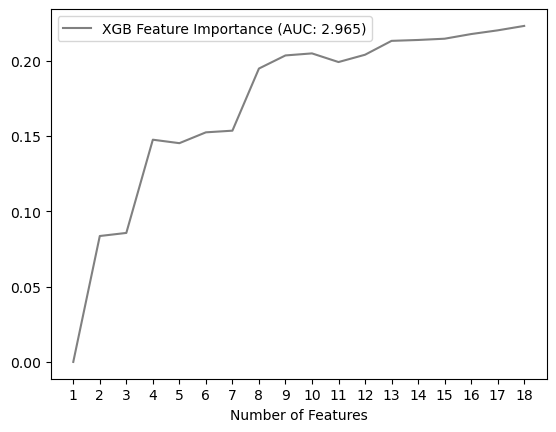

In [24]:
xgb_list = ['wind_speed',
 'std_tri',
 'track_distance',
 'with_coast',
 'rainfall_max_24h',
 'mean_tri',
 'percent_houses_damaged_5years',
 'rainfall_max_6h',
 'mean_slope',
 'std_slope',
 'total_pop',
 'mean_elev',
 'water',
 'total_houses',
 'rural',
 'rwi',
 'coast_length',
 'urban']

auc_PGI(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance", color='gray')
auc_PGI(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance", color='navy') #lightcoral royalblue
auc_PGI(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance", color='firebrick')
plt.title("PGI Comparison")
plt.ylabel("PGI")


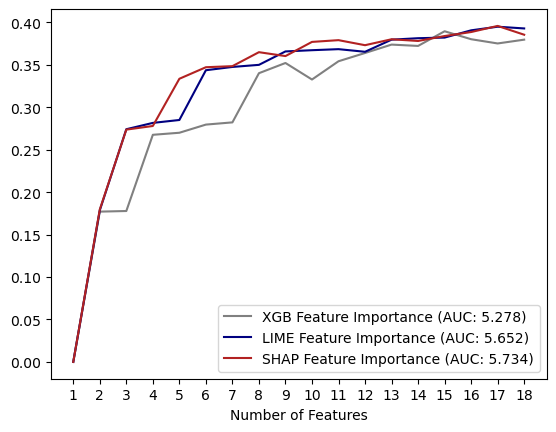

In [50]:
auc_PGI(xgb_list, X_train, model, 0, std_fix=0.2, seed = 0, label = "XGB Feature Importance", color='gray')
auc_PGI(lime_list, X_train, model, 0, std_fix=0.2, seed = 0, label= "LIME Feature Importance", color='navy')
auc_PGI(shap_list, X_train, model, 0, std_fix=0.2, seed = 0, label= "SHAP Feature Importance",color='firebrick')

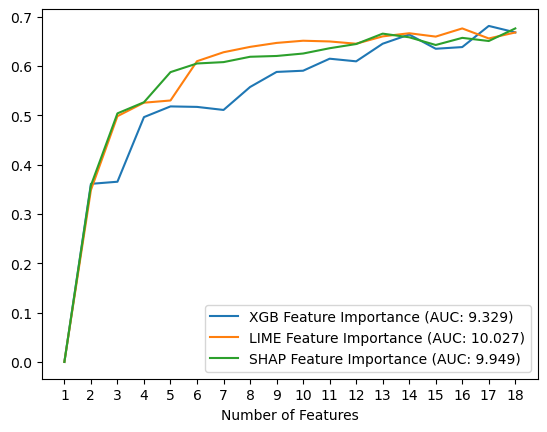

In [26]:
auc_PGI(xgb_list, X_train, model, 0, std_fix=0.4, seed = 0, label = "XGB Feature Importance")
auc_PGI(lime_list, X_train, model, 0, std_fix=0.4, seed = 0, label= "LIME Feature Importance")
auc_PGI(shap_list, X_train, model, 0, std_fix=0.4, seed = 0, label= "SHAP Feature Importance")

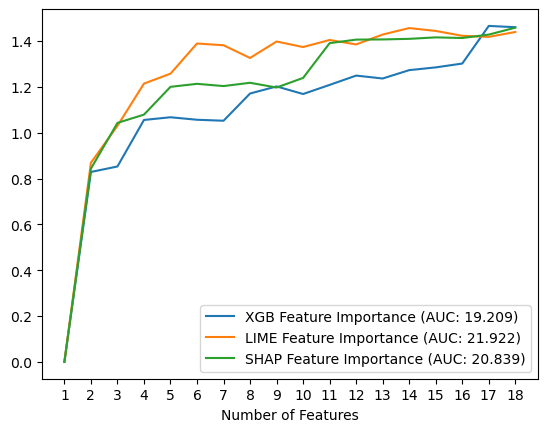

In [27]:
auc_PGI(xgb_list, X_train, model, 0, std_fix=0.8, seed = 0, label = "XGB Feature Importance")
auc_PGI(lime_list, X_train, model, 0, std_fix=0.8, seed = 0, label= "LIME Feature Importance")
auc_PGI(shap_list, X_train, model, 0, std_fix=0.8, seed = 0, label= "SHAP Feature Importance")

In [28]:
print(xgb_list)
xgb_list[::-1]

['wind_speed', 'std_tri', 'track_distance', 'with_coast', 'rainfall_max_24h', 'mean_tri', 'percent_houses_damaged_5years', 'rainfall_max_6h', 'mean_slope', 'std_slope', 'total_pop', 'mean_elev', 'water', 'total_houses', 'rural', 'rwi', 'coast_length', 'urban']


['urban',
 'coast_length',
 'rwi',
 'rural',
 'total_houses',
 'water',
 'mean_elev',
 'total_pop',
 'std_slope',
 'mean_slope',
 'rainfall_max_6h',
 'percent_houses_damaged_5years',
 'mean_tri',
 'rainfall_max_24h',
 'with_coast',
 'track_distance',
 'std_tri',
 'wind_speed']

### Permutation by switiching column values

In [20]:
## Perturb with random value
import numpy as np

def perturb_random(df, col_list, mean, std_fix = 0, std_spec = 0, seed=None):
    df = df.copy()
    if seed is not None:
        np.random.seed(seed)
    for col in col_list:
        # random reorder of the column
        df[col] = np.random.permutation(df[col])
    return df

In [21]:
def PGI_switch(data, model, collist, mean, std_fix = 0, std_spec = 0, seed=None):
    data_perturb = perturb_random(data, collist, mean, std_fix, std_spec, seed)
    try:
        y_pred = model.predict(data)
    except:
        y_pred = model.predict(data.values) 
    y_pred_perturb = model.predict(data_perturb)
    return np.mean(np.abs(y_pred_perturb - y_pred))

In [29]:
def auc_PGI_switch(feature_list, data, model, mean = 0, std_fix = 0, std_spec = 0, seed=None, label = None):
    PGI_list = []
    for k in range(len(feature_list)):
        p = PGI_switch(data, model, feature_list[:k], mean, std_fix = std_fix, std_spec = std_spec, seed=None)
        PGI_list.append(p)
    a = (auc(range(len(PGI_list)), PGI_list))
    plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a))
    plt.xlabel('Number of Features')
    plt.xticks(range(len(PGI_list)), list(range(1,19)))
    if label:
        plt.legend()

In [39]:
model = Load_Model('xgb_model')

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




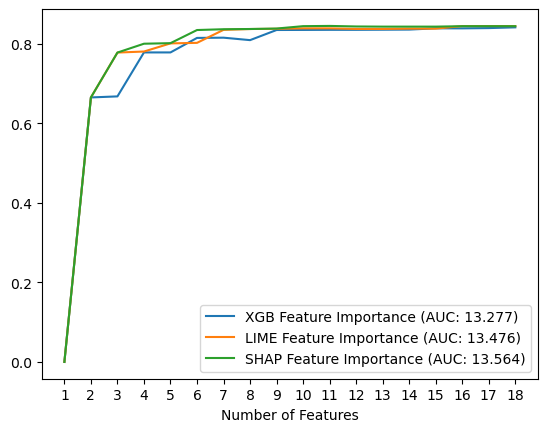

In [40]:
auc_PGI_switch(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance")
auc_PGI_switch(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance")
auc_PGI_switch(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance")

### Mean substitution

In [37]:
np.array(X_test["wind_speed"].mean()*np.ones(len(X_test))).shape

(9951,)

In [32]:
## Perturb with random value
import numpy as np

def auc_PGI_mean(feature_list, data, model, mean = 0, std_fix = 0, std_spec = 0, seed=None, label = None):
    def PGI_switch(data, model, collist, mean, std_fix = 0, std_spec = 0, seed=None):
        def perturb_random(df, col_list, mean, std_fix = 0, std_spec = 0, seed=None):
            df = df.copy()
            if seed is not None:
                np.random.seed(seed)
            for col in col_list:
                # substitute column values with mean
                df[col] = np.array(df[col].mean()*np.ones(len(df)))
            return df
        
        data_perturb = perturb_random(data, collist, mean, std_fix, std_spec, seed)
        try:
            y_pred = model.predict(data)
        except:
            y_pred = model.predict(data.values) 
        y_pred_perturb = model.predict(data_perturb)
        return np.mean(np.abs(y_pred_perturb - y_pred))
    
    
    
    PGI_list = []
    for k in range(len(feature_list)):
        p = PGI_switch(data, model, feature_list[:k], mean, std_fix = std_fix, std_spec = std_spec, seed=None)
        PGI_list.append(p)
    a = (auc(range(len(PGI_list)), PGI_list))
    plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a))
    plt.xlabel('Number of Features')
    plt.xticks(range(len(PGI_list)), list(range(1,19)))
    if label:
        plt.legend()



A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




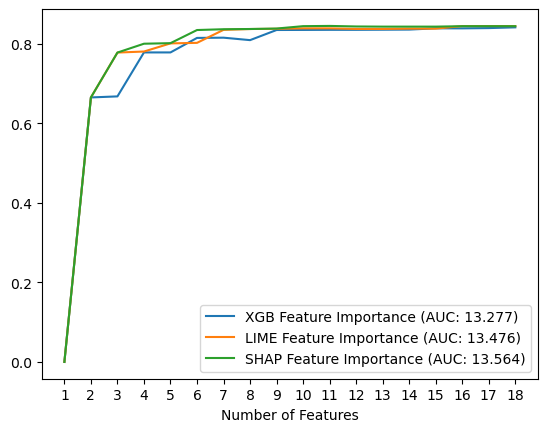

In [38]:
model = Load_Model('xgb_model')
auc_PGI_mean(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance")
auc_PGI_mean(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance")
auc_PGI_mean(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance")

## PGU

Text(0, 0.5, 'PGU')

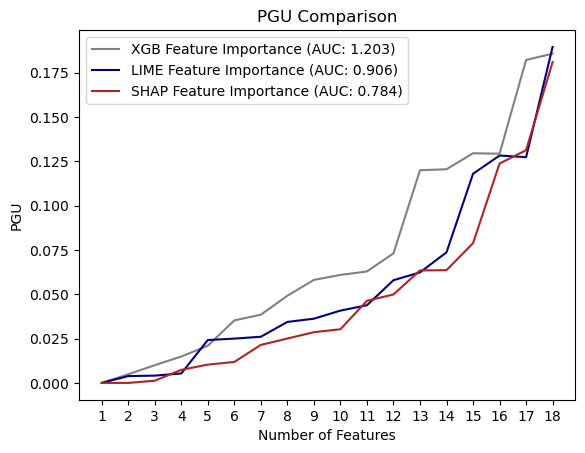

In [52]:
# PGU

auc_PGI(xgb_list[::-1], X_train, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance", color='gray')
auc_PGI(lime_list[::-1], X_train, model, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance", color='navy')
auc_PGI(shap_list[::-1], X_train, model, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance", color='firebrick')
plt.title("PGU Comparison")
plt.ylabel("PGU")

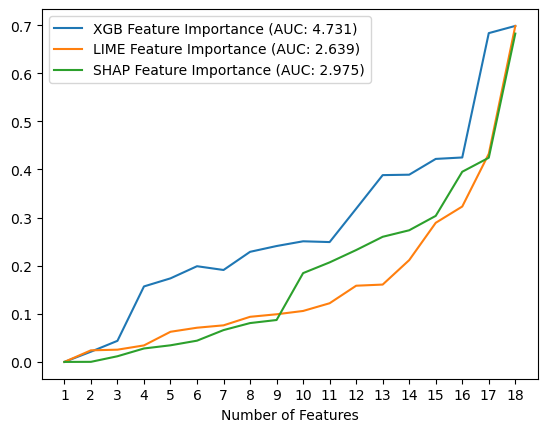

In [30]:
auc_PGI(xgb_list[::-1], X_train, model, 0, std_fix=0.7, seed = 0, label = "XGB Feature Importance")
auc_PGI(lime_list[::-1], X_train, model, 0, std_fix=0.7, seed = 0, label= "LIME Feature Importance")
auc_PGI(shap_list[::-1], X_train, model, 0, std_fix=0.7, seed = 0, label= "SHAP Feature Importance")

In [31]:
print(xgb_list)
print(lime_list)
print(shap_list)

['wind_speed', 'std_tri', 'track_distance', 'with_coast', 'rainfall_max_24h', 'mean_tri', 'percent_houses_damaged_5years', 'rainfall_max_6h', 'mean_slope', 'std_slope', 'total_pop', 'mean_elev', 'water', 'total_houses', 'rural', 'rwi', 'coast_length', 'urban']
['wind_speed', 'track_distance', 'rwi', 'rainfall_max_6h', 'percent_houses_damaged_5years', 'rainfall_max_24h', 'urban', 'mean_elev', 'coast_length', 'rural', 'std_slope', 'total_pop', 'water', 'mean_tri', 'total_houses', 'std_tri', 'with_coast', 'mean_slope']
['wind_speed', 'track_distance', 'rainfall_max_6h', 'percent_houses_damaged_5years', 'rainfall_max_24h', 'urban', 'mean_elev', 'coast_length', 'total_houses', 'rwi', 'std_slope', 'mean_slope', 'total_pop', 'mean_tri', 'water', 'rural', 'std_tri', 'with_coast']


<Axes: >

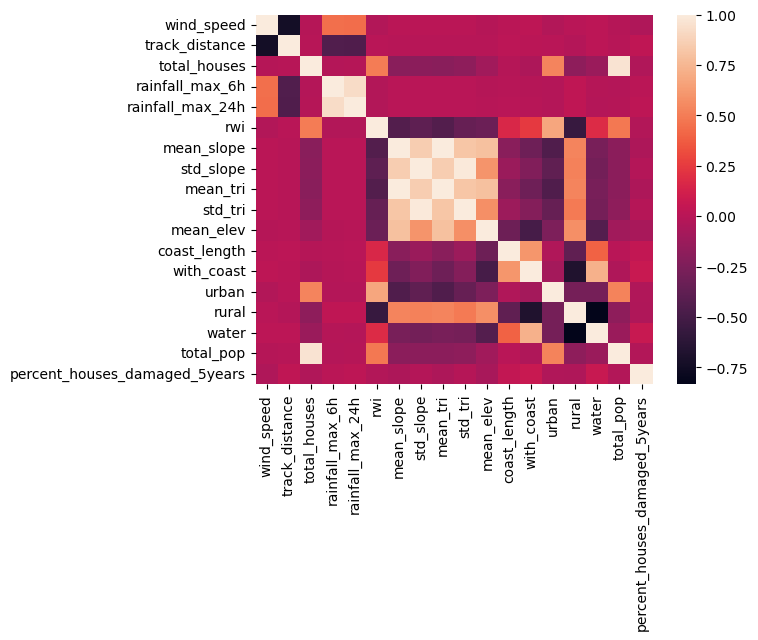

In [32]:
# correlation matrix of features
import seaborn as sns
corr = X_test.corr()
sns.heatmap(corr)

## 1 feature at a time

In [60]:
def auc_PGI(feature_list, data, model, mean = 0, std_fix = 0, std_spec = 0, seed=None, label = None):
    PGI_list = []
    for k in range(len(feature_list)):
        p = PGI(data, model, feature_list[:k], mean, std_fix = std_fix, std_spec = std_spec, seed=None)
        PGI_list.append(p)
    a = (auc(range(len(PGI_list)), PGI_list))
    plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a))
    plt.xlabel('Number of Features')
    plt.xticks(range(len(PGI_list)), list(range(1,19)))
    if label:
        plt.legend()

In [34]:
def PGI_individual(feature_list, data, model, mean = 0, std_fix = 0, std_spec = 0, seed=None, label = None):
    PGI_list = []
    for k in range(len(feature_list)):
        p = PGI(data, model, feature_list[k:k+1], mean, std_fix = std_fix, std_spec = std_spec, seed=None)
        PGI_list.append(p)
    a = (auc(range(len(PGI_list)), PGI_list))
    plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a))
    plt.xlabel('Number of Features')
    plt.xticks(range(len(PGI_list)), list(range(1,19)))
    if label:
        plt.legend()

In [35]:
for k in range(len(xgb_list)):
    print(xgb_list[k:k+1])

#print(perturb(X_test, ['wind_speed'], 0, std_spec=0.1, seed = 0))

['wind_speed']
['std_tri']
['track_distance']
['with_coast']
['rainfall_max_24h']
['mean_tri']
['percent_houses_damaged_5years']
['rainfall_max_6h']
['mean_slope']
['std_slope']
['total_pop']
['mean_elev']
['water']
['total_houses']
['rural']
['rwi']
['coast_length']
['urban']


Text(0.5, 1.0, 'Permutation of Individual Features')

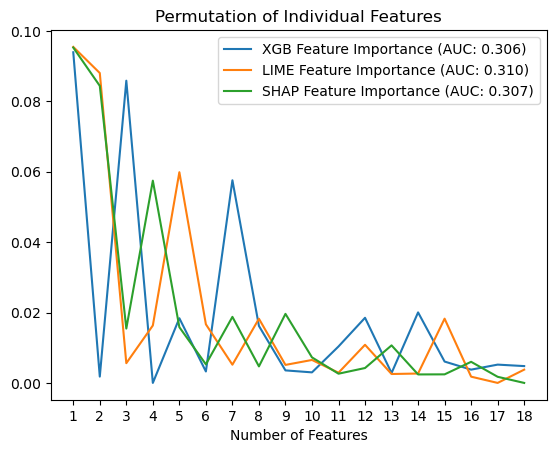

In [53]:
PGI_individual(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance")
PGI_individual(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance")
PGI_individual(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance")
plt.title("Permutation of Individual Features")

In [37]:
print(lime_list)
print(shap_list)

['wind_speed', 'track_distance', 'rwi', 'rainfall_max_6h', 'percent_houses_damaged_5years', 'rainfall_max_24h', 'urban', 'mean_elev', 'coast_length', 'rural', 'std_slope', 'total_pop', 'water', 'mean_tri', 'total_houses', 'std_tri', 'with_coast', 'mean_slope']
['wind_speed', 'track_distance', 'rainfall_max_6h', 'percent_houses_damaged_5years', 'rainfall_max_24h', 'urban', 'mean_elev', 'coast_length', 'total_houses', 'rwi', 'std_slope', 'mean_slope', 'total_pop', 'mean_tri', 'water', 'rural', 'std_tri', 'with_coast']


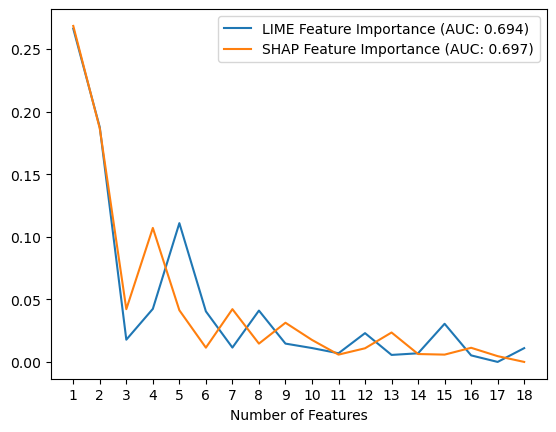

In [38]:
#PGI_individual(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance")
PGI_individual(lime_list, X_train, model, 0, std_fix=0.3, seed = 90, label= "LIME Feature Importance")
PGI_individual(shap_list, X_train, model, 0, std_fix=0.3, seed = 90, label= "SHAP Feature Importance")

# Two Stage Model

In [14]:
shap_list_xgb2 = ['wind_speed', 'track_distance', 'percent_houses_damaged_5years',
       'rainfall_max_6h', 'rainfall_max_24h', 'mean_elev', 'mean_slope',
       'coast_length', 'rural', 'total_houses', 'std_tri', 'urban',
       'std_slope', 'mean_tri', 'rwi', 'total_pop', 'water', 'with_coast']

lime_list_xgb2 = ['wind_speed',
 'track_distance',
 'rwi',
 'rainfall_max_6h',
 'percent_houses_damaged_5years',
 'rainfall_max_24h',
 'total_pop',
 'coast_length',
 'urban',
 'rural',
 'total_houses',
 'mean_slope',
 'mean_elev',
 'std_tri',
 'mean_tri',
 'water',
 'std_slope',
 'with_coast']

In [15]:
from model_function import Load_Model, TwoStageXGB
model = TwoStageXGB()
model.fit(X_train, y_train)


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

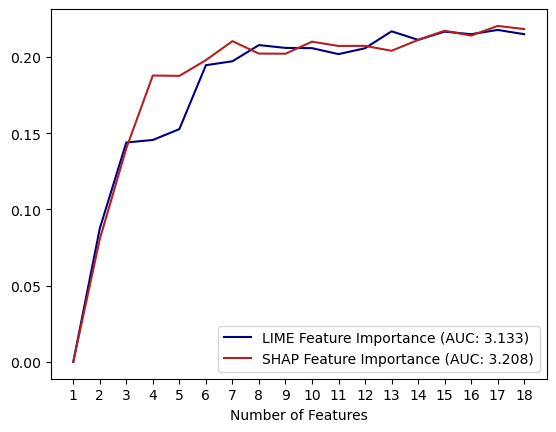

In [19]:
auc_PGI(lime_list_xgb2, X_train, model, 0, std_fix=0.1, seed = 90, label= "LIME Feature Importance", color='navy')
auc_PGI(shap_list_xgb2, X_train, model, 0, std_fix=0.1, seed = 90, label= "SHAP Feature Importance", color='firebrick')

In [ ]:
def PGI(data, model, collist, mean, std_fix = 0, std_spec = 0, seed=None):
    data_perturb = perturb(data, collist, mean, std_fix, std_spec, seed)
    try:
        y_pred = model.predict(data)
    except:
        y_pred = model.predict(data.values) 
    y_pred_perturb = model.predict(data_perturb)
    return np.mean(np.abs(y_pred_perturb - y_pred))